0:	learn: 0.6704368	total: 316ms	remaining: 30.3s
1:	learn: 0.6541067	total: 596ms	remaining: 28.3s
2:	learn: 0.6428077	total: 883ms	remaining: 27.7s
3:	learn: 0.6345547	total: 1.15s	remaining: 26.8s
4:	learn: 0.6284846	total: 1.46s	remaining: 26.9s
5:	learn: 0.6235740	total: 1.75s	remaining: 26.5s
6:	learn: 0.6199241	total: 2.17s	remaining: 27.9s
7:	learn: 0.6172894	total: 2.49s	remaining: 27.7s
8:	learn: 0.6144144	total: 2.81s	remaining: 27.5s
9:	learn: 0.6126576	total: 3.07s	remaining: 26.7s
10:	learn: 0.6107406	total: 3.32s	remaining: 25.9s
11:	learn: 0.6093574	total: 3.57s	remaining: 25.3s
12:	learn: 0.6081419	total: 3.84s	remaining: 24.8s
13:	learn: 0.6064121	total: 4.17s	remaining: 24.8s
14:	learn: 0.6052768	total: 4.47s	remaining: 24.5s
15:	learn: 0.6040734	total: 4.73s	remaining: 24s
16:	learn: 0.6030912	total: 5.01s	remaining: 23.6s
17:	learn: 0.6021371	total: 5.25s	remaining: 23s
18:	learn: 0.6009130	total: 5.5s	remaining: 22.6s
19:	learn: 0.6002865	total: 5.71s	remaining: 2

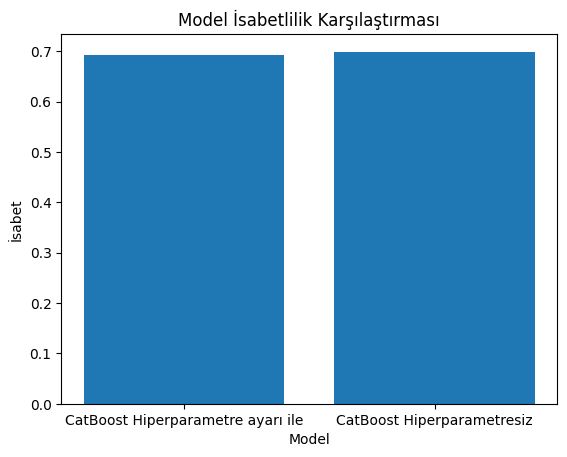

In [2]:
# Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier  
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Veri Setini Yükle ve Oku
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Veri Ön İşleme Adımı

# Eksik değerleri ele al, gerekiyorsa kaldır
data.dropna(inplace=True)

# Kategorik değişkenleri kodla
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Veriyi X (özellikler) ve y (hedef) olarak böl
X = data.drop('Delay', axis=1)
y = data['Delay']

# Veriyi Eğitim ve Test Kümelerine Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CatBoost için Model Değerlendirmesi ve Eğitimi
model_cat1 = CatBoostClassifier(learning_rate=0.19, iterations=97, depth=11)  # CatBoost hyper parametre model parametreleri
model_cat1.fit(X_train, y_train)  #  CatBoost model Eğitimi

# CatBoost Model Eğitimi
y_pred_cat1 = model_cat1.predict(X_test)
accuracy_cat1 = accuracy_score(y_test, y_pred_cat1)
report_cat1 = classification_report(y_test, y_pred_cat1)

print(f'CatBoost Hiperparametreli İsabeti: {accuracy_cat1}')
print(report_cat1)

model_cat2 = CatBoostClassifier()  #CatBoost model  hyperparametersiz oluştur

model_cat2.fit(X_train, y_train)  # CatBoost model eğit

# CatBoost Model Değerlendirme
y_pred_cat2 = model_cat2.predict(X_test)
accuracy_cat2 = accuracy_score(y_test, y_pred_cat2)
report_cat2 = classification_report(y_test, y_pred_cat2)

print(f'CatBoost Hiperparametresiz İsabeti: {accuracy_cat2}')
print(report_cat2)

# İsabeti her iki model için tanımla
accuracy = [accuracy_cat1, accuracy_cat2]

# Etiketleri her iki model için tanımla
labels = ['CatBoost Hiperparametre ayarı ile', 'CatBoost Hiperparametresiz']

plt.bar(labels, accuracy)
plt.xlabel('Model')
plt.ylabel('İsabet')
plt.title('Model İsabetlilik Karşılaştırması')
plt.show()
